In [55]:
%reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from plotnine import *
#from plotnine.data import *
import os

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [56]:
PATH = 'Data'
cats = pd.read_csv(os.path.join(PATH,'item_categories.csv'))
items = pd.read_csv(os.path.join(PATH,'items.csv'))
sales = pd.read_csv(os.path.join(PATH,'sales_train.csv.gz'))
shops = pd.read_csv(os.path.join(PATH,'shops.csv'))
test = pd.read_csv(os.path.join(PATH,'test.csv.gz'))

In [6]:
cats.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [7]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [87]:
#sales["dates"] = pd.to_datetime(sales["date"], format="%d.%m.%Y")
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,dates
0,02.01.2013,0,59,22154,999.00,1.0,2013-01-02
1,03.01.2013,0,25,2552,899.00,1.0,2013-01-03
2,05.01.2013,0,25,2552,899.00,-1.0,2013-01-05
3,06.01.2013,0,25,2554,1709.05,1.0,2013-01-06
4,15.01.2013,0,25,2555,1099.00,1.0,2013-01-15


In [88]:
print(len(sales['shop_id'].unique()))
print(len(sales['item_id'].unique()))
print(sales['item_id'].max())
print(sales['item_id'].min())

60
21807
22169
0


In [65]:
sales.date_block_num.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [81]:
np.where(sales.item_id == 6152)[0]

array([], dtype=int64)

In [104]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935846 entries, 0 to 2935848
Data columns (total 7 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dates             datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 259.2+ MB


In [9]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [15]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [19]:
print("unique shop id : {}".format(len(test['shop_id'].unique())))
print("unique item id : {}".format(len(test['item_id'].unique())))
print("nrows : {}".format(len(test)))
unique, counts = np.unique(test['shop_id'], return_counts=True)
print(np.asarray((unique, counts)).T)

unique shop id : 42
unique item id : 5100
nrows : 214200
[[   2 5100]
 [   3 5100]
 [   4 5100]
 [   5 5100]
 [   6 5100]
 [   7 5100]
 [  10 5100]
 [  12 5100]
 [  14 5100]
 [  15 5100]
 [  16 5100]
 [  18 5100]
 [  19 5100]
 [  21 5100]
 [  22 5100]
 [  24 5100]
 [  25 5100]
 [  26 5100]
 [  28 5100]
 [  31 5100]
 [  34 5100]
 [  35 5100]
 [  36 5100]
 [  37 5100]
 [  38 5100]
 [  39 5100]
 [  41 5100]
 [  42 5100]
 [  44 5100]
 [  45 5100]
 [  46 5100]
 [  47 5100]
 [  48 5100]
 [  49 5100]
 [  50 5100]
 [  52 5100]
 [  53 5100]
 [  55 5100]
 [  56 5100]
 [  57 5100]
 [  58 5100]
 [  59 5100]]


In [86]:
test.item_id.max()

22167

In [26]:
shop_id_diff = list(set(sales['shop_id'].unique())-set(test['shop_id'].unique()))

In [36]:
shop_id_diff.sort()
print(shop_id_diff)

[0, 1, 8, 9, 11, 13, 17, 20, 23, 27, 29, 30, 32, 33, 40, 43, 51, 54]


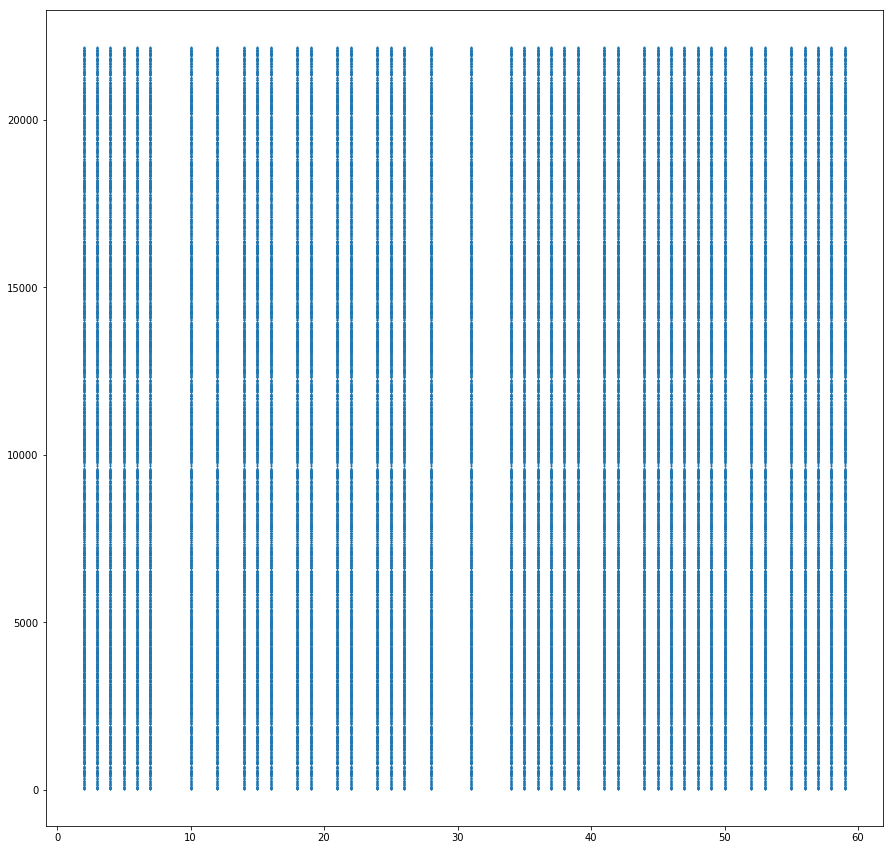

In [39]:
plt.figure(figsize=(15,15))
plt.scatter(x = test.shop_id,y = test.item_id, s =.5,cmap = ['r','b'])
plt.show()

In [42]:
print(test.item_id.max())
print(test.item_id.min())
print(test.item_id.max() - test.item_id.min())

22167
30
22137


In [51]:
item_id_diff = list(set(sales['item_id'].unique()) - set(test['item_id'].unique()))

In [52]:
#item appear in sales but not in test
print(len(item_id_diff))

17070


In [50]:
print(len(test.item_id.unique()))
print(len(sales.item_id.unique()))

5100
21807


In [77]:
item_id_diff_reverse = list(set(test['item_id'].unique()) - set(sales['item_id'].unique()))

In [54]:
#item appear in test but not in sales
print(len(item_id_diff_reverse))

363


In [78]:
item_id_diff_reverse

[20486,
 6152,
 6153,
 6169,
 14383,
 20535,
 4156,
 10310,
 20560,
 20561,
 83,
 20577,
 16498,
 20594,
 6259,
 20599,
 20600,
 12409,
 18560,
 10372,
 140,
 8337,
 12441,
 8354,
 8355,
 168,
 173,
 12468,
 12469,
 12470,
 12471,
 14521,
 6335,
 18627,
 20677,
 20680,
 204,
 4310,
 16601,
 4318,
 237,
 10483,
 249,
 254,
 10507,
 2322,
 2323,
 2324,
 2325,
 2326,
 2327,
 2328,
 12568,
 20760,
 12574,
 16675,
 6439,
 302,
 12591,
 14647,
 14648,
 4412,
 20796,
 14662,
 8545,
 20836,
 8549,
 20837,
 8551,
 20843,
 20845,
 2420,
 6519,
 6520,
 6521,
 2426,
 2427,
 2428,
 6522,
 6523,
 20863,
 6524,
 6525,
 2434,
 6531,
 6526,
 6527,
 6528,
 6529,
 6530,
 6532,
 6533,
 20878,
 20879,
 20880,
 402,
 14739,
 14760,
 16811,
 428,
 16813,
 430,
 14765,
 14784,
 454,
 480,
 18913,
 8676,
 14832,
 6645,
 10747,
 12802,
 20996,
 2569,
 8722,
 10779,
 4642,
 18979,
 566,
 8760,
 6729,
 6730,
 6731,
 6732,
 6733,
 6734,
 16976,
 6742,
 6743,
 12890,
 19048,
 14959,
 8821,
 8822,
 8823,
 8824,
 882

In [85]:
#double check item_id_diff_reverse don't appear in sales
set(list(sales.item_id)) & set(item_id_diff_reverse)

set()

In [89]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,dates
0,02.01.2013,0,59,22154,999.00,1.0,2013-01-02
1,03.01.2013,0,25,2552,899.00,1.0,2013-01-03
2,05.01.2013,0,25,2552,899.00,-1.0,2013-01-05
3,06.01.2013,0,25,2554,1709.05,1.0,2013-01-06
4,15.01.2013,0,25,2555,1099.00,1.0,2013-01-15


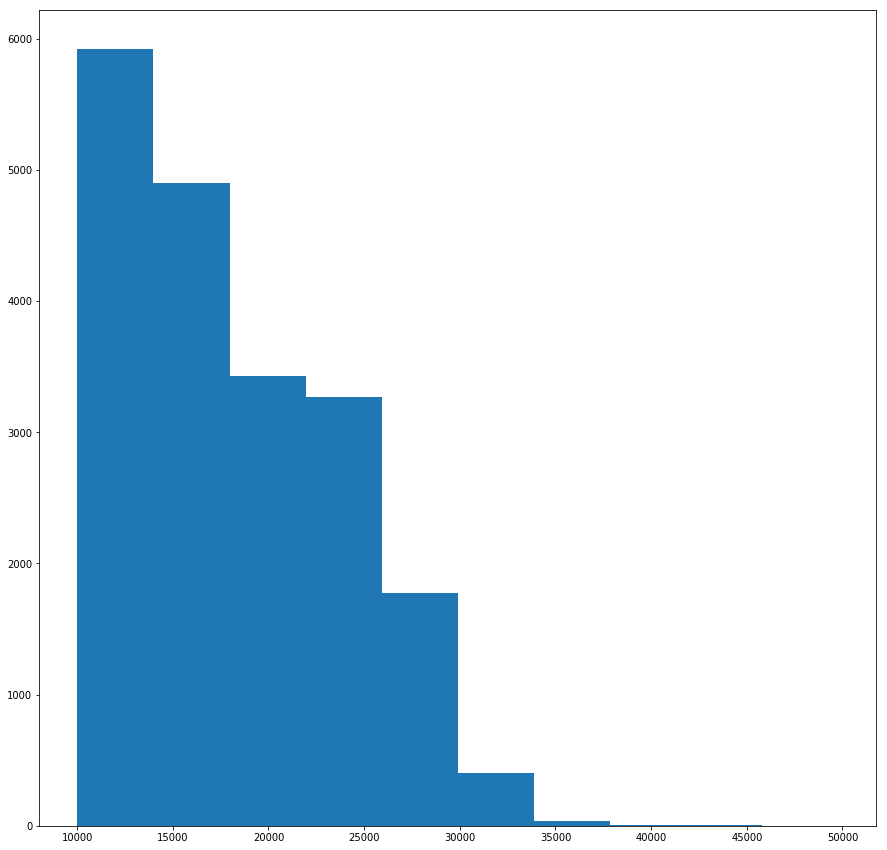

In [103]:
#sales = sales[sales.item_price < 50000]
plt.figure(figsize=(15,15))
plt.hist(sales['item_price'][sales['item_price']>10000])
plt.show()

In [100]:
copy = sales[["item_id","item_price"]]

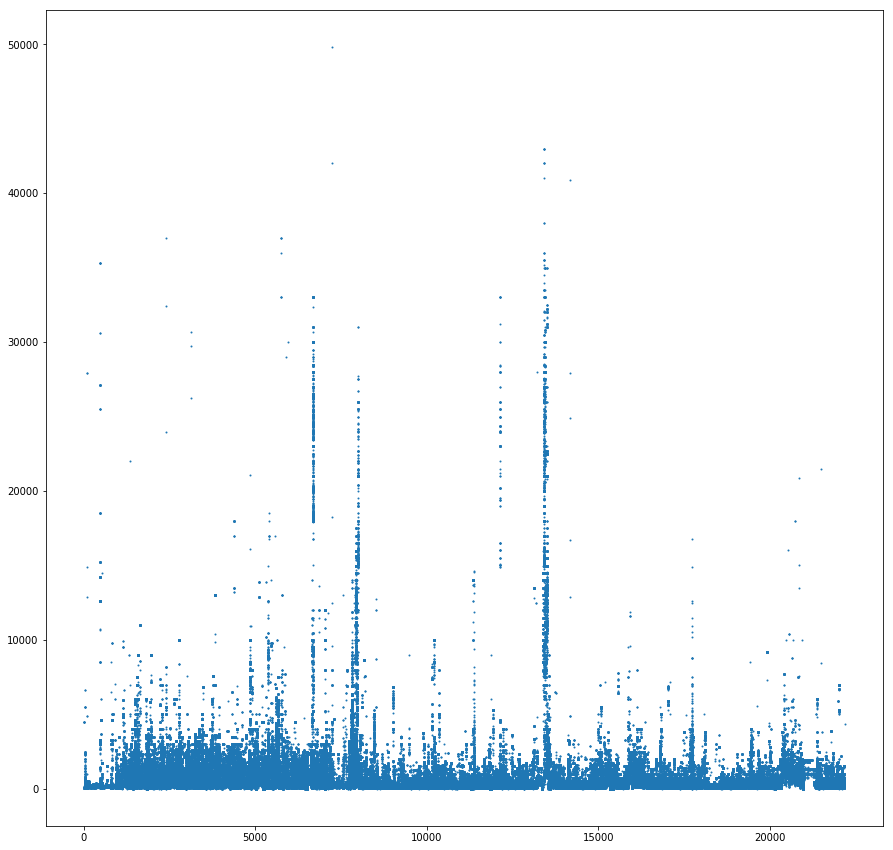

In [102]:
plt.figure(figsize=(15,15))
plt.scatter(x = copy.item_id,y = copy.item_price, s = 1,cmap = ['r','b'])
plt.show()

In [107]:
df = sales.copy()

In [110]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,dates
0,02.01.2013,0,59,22154,999.00,1.0,2013-01-02
1,03.01.2013,0,25,2552,899.00,1.0,2013-01-03
2,05.01.2013,0,25,2552,899.00,-1.0,2013-01-05
3,06.01.2013,0,25,2554,1709.05,1.0,2013-01-06
4,15.01.2013,0,25,2555,1099.00,1.0,2013-01-15


In [109]:
df['dates'] = pd.to_datetime(df['date'], dayfirst = True, format ='%d.%m.%Y')

In [111]:
df = pd.merge(df, items, on='item_id')
df = pd.merge(df, cats, on='item_category_id')
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,dates,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,2013-01-02,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,23.01.2013,0,24,22154,999.0,1.0,2013-01-23,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,20.01.2013,0,27,22154,999.0,1.0,2013-01-20,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,02.01.2013,0,25,22154,999.0,1.0,2013-01-02,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,03.01.2013,0,25,22154,999.0,1.0,2013-01-03,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


In [122]:
df.item_cnt_day.max()

2169.0

In [157]:
df = df[df.item_cnt_day<1000]

In [193]:
sales = df

In [153]:
from itertools import product
# Create "grid" with columns
index_cols = ['shop_id', 'item_id', 'date_block_num']

# For every month we create a grid from all shops/items combinations from that month
grid = []
for block_num in df['date_block_num'].unique():
    cur_shops = df.loc[df['date_block_num'] == block_num,'shop_id'].unique()
    cur_items = df.loc[df['date_block_num'] == block_num,'item_id'].unique()
    grid.append(np.array(list(product(*[cur_shops,cur_items,[block_num]])),dtype = 'int32'))
grid = pd.DataFrame(np.vstack(grid),columns=index_cols)

In [202]:
grid.head()

,shop_id,item_id,date_block_num
0,59,22154,0
1,59,944,0
2,59,965,0
3,59,1110,0
4,59,3298,0


In [200]:
sales_m = df.groupby(['date_block_num','shop_id','item_id']).agg({'item_cnt_day': 'sum','item_price': np.mean}).reset_index()

In [201]:
sales_m.head()

,date_block_num,shop_id,item_id,item_cnt_day,item_price
0,0,0,32,6.0,221.0
1,0,0,33,3.0,347.0
2,0,0,35,1.0,247.0
3,0,0,43,1.0,221.0
4,0,0,51,2.0,128.5


In [203]:
sales_m = pd.merge(grid,sales_m,on=['date_block_num','shop_id','item_id'],how='left')

In [205]:
sales_m.head()

,shop_id,item_id,date_block_num,item_cnt_day,item_price
0,59,22154,0,1.0,999.0
1,59,944,0,NaN,NaN
2,59,965,0,NaN,NaN
3,59,1110,0,NaN,NaN
4,59,3298,0,NaN,NaN


In [198]:
sales[(sales['shop_id']==59) & (sales['item_id']==944)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,dates,item_name,item_category_id,item_category_name
101,26.04.2013,3,59,944,150.0,1.0,2013-04-26,2012 (BD),37,Кино - Blu-Ray
143,26.06.2013,5,59,944,199.5,1.0,2013-06-26,2012 (BD),37,Кино - Blu-Ray
184,20.07.2013,6,59,944,199.5,1.0,2013-07-20,2012 (BD),37,Кино - Blu-Ray
265,14.09.2013,8,59,944,299.0,2.0,2013-09-14,2012 (BD),37,Кино - Blu-Ray
297,21.10.2013,9,59,944,299.0,1.0,2013-10-21,2012 (BD),37,Кино - Blu-Ray
325,02.11.2013,10,59,944,299.0,1.0,2013-11-02,2012 (BD),37,Кино - Blu-Ray
356,06.01.2014,12,59,944,299.0,1.0,2014-01-06,2012 (BD),37,Кино - Blu-Ray
398,30.03.2014,14,59,944,299.0,1.0,2014-03-30,2012 (BD),37,Кино - Blu-Ray
407,20.04.2014,15,59,944,199.0,1.0,2014-04-20,2012 (BD),37,Кино - Blu-Ray
479,12.05.2014,16,59,944,199.0,1.0,2014-05-12,2012 (BD),37,Кино - Blu-Ray


In [206]:
sales_m = pd.merge(sales_m, items, on = ['item_id'], how = 'left')

In [207]:
sales_m.head()

,shop_id,item_id,date_block_num,item_cnt_day,item_price,item_name,item_category_id
0,59,22154,0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37
1,59,944,0,NaN,NaN,2012 (BD),37
2,59,965,0,NaN,NaN,28 ДНЕЙ СПУСТЯ (BD),37
3,59,1110,0,NaN,NaN,8 ПЕРВЫХ СВИДАНИЙ (BD),37
4,59,3298,0,NaN,NaN,FAUST (BD),37


In [220]:
for type_id in ['item_id','shop_id','item_category_id']:
    for column_id,aggregator,aggtype in [('item_price',np.mean,'avg'),('item_cnt_day',np.sum,'sum'),('item_cnt_day',np.mean,'avg')]:

        mean_df = sales.groupby([type_id,'date_block_num']).aggregate(aggregator).reset_index()[[column_id,type_id,'date_block_num']]
        mean_df.columns = [type_id+'_'+aggtype+'_'+column_id,type_id,'date_block_num']

        sales_m = pd.merge(sales_m,mean_df,on=['date_block_num',type_id],how='left')

In [221]:
sales_m

,shop_id,item_id,date_block_num,item_cnt_day,item_price,item_name,item_category_id,item_id_avg_item_price_x,item_id_sum_item_cnt_day_x,item_id_avg_item_cnt_day_x,...,item_category_id_avg_item_cnt_day_x,item_id_avg_item_price_y,item_id_sum_item_cnt_day_y,item_id_avg_item_cnt_day_y,shop_id_avg_item_price_y,shop_id_sum_item_cnt_day_y,shop_id_avg_item_cnt_day_y,item_category_id_avg_item_price_y,item_category_id_sum_item_cnt_day_y,item_category_id_avg_item_cnt_day_y
0,59,22154,0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,999.000000,18.0,1.000000,...,1.053414,999.000000,18.0,1.000000,820.174553,2017.0,1.092041,465.036007,6094.0,1.053414
1,59,944,0,NaN,NaN,2012 (BD),37,539.807391,24.0,1.043478,...,1.053414,539.807391,24.0,1.043478,820.174553,2017.0,1.092041,465.036007,6094.0,1.053414
2,59,965,0,NaN,NaN,28 ДНЕЙ СПУСТЯ (BD),37,273.745455,11.0,1.000000,...,1.053414,273.745455,11.0,1.000000,820.174553,2017.0,1.092041,465.036007,6094.0,1.053414
3,59,1110,0,NaN,NaN,8 ПЕРВЫХ СВИДАНИЙ (BD),37,149.000000,8.0,1.000000,...,1.053414,149.000000,8.0,1.000000,820.174553,2017.0,1.092041,465.036007,6094.0,1.053414
4,59,3298,0,NaN,NaN,FAUST (BD),37,195.683333,12.0,1.000000,...,1.053414,195.683333,12.0,1.000000,820.174553,2017.0,1.092041,465.036007,6094.0,1.053414
5,59,1273,0,NaN,NaN,"ALL INCLUSIVE, ИЛИ ВСЕ ВКЛЮЧЕНО (BD)",37,190.142857,7.0,1.000000,...,1.053414,190.142857,7.0,1.000000,820.174553,2017.0,1.092041,465.036007,6094.0,1.053414
6,59,1112,0,NaN,NaN,9 (ДЕВЯТЬ) (BD),37,488.000000,17.0,1.000000,...,1.053414,488.000000,17.0,1.000000,820.174553,2017.0,1.092041,465.036007,6094.0,1.053414
7,59,21619,0,NaN,NaN,ЧЕЛОВЕК ДОЖДЯ (BD),37,407.530000,5.0,1.000000,...,1.053414,407.530000,5.0,1.000000,820.174553,2017.0,1.092041,465.036007,6094.0,1.053414
8,59,21759,0,1.0,499.0,ЧУЖОЙ ПРОТИВ ХИЩНИКА (BD),37,475.625000,8.0,1.000000,...,1.053414,475.625000,8.0,1.000000,820.174553,2017.0,1.092041,465.036007,6094.0,1.053414
9,59,21861,0,NaN,NaN,ШЕРЛОК. СЕЗОН 2 (BD),37,145.226667,47.0,1.044444,...,1.053414,145.226667,47.0,1.044444,820.174553,2017.0,1.092041,465.036007,6094.0,1.053414
